In [2]:
import logging

log_file_name = 'decision.log'
log_mode='w'
log_level = logging.DEBUG
log_delimiter = ' | '
log_fields = ('asctime', 'module', 'funcName', 'name', 'levelname', 'message')

logger = logging.getLogger()
fhandler = logging.FileHandler(filename=log_file_name, mode=log_mode)
formatter = logging.Formatter(log_delimiter.join(map(lambda f: '%({})s'.format(f), log_fields)))
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(log_level)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
def print_log(log_file_name, log_fields=None, log_filter=None, log_delimiter='|'):
    if log_fields is None:
        filter_field, filter_value = None, None
        filter_field_index = None
    else:        
        header = dict([(field, index) for index, field in enumerate(log_fields)])

        if log_filter is None:
            filter_field, filter_value = None, None
        elif len(log_filter) == 2:
            filter_field, filter_value = log_filter
            filter_field_index = header.get(filter_field, None)
            if filter_field_index is None:
                message = 'WARNING - filter_field ({}) not found in field names: {}'.format(filter_field, header.keys())
                logging.warning(message)
        else:
            raise ValueError('ERROR - log_filter must have the format (filter_field, filter_value), but received: {}'.format(log_filter))
        
    with open(log_file_name, 'r') as log_file:
        for line_number, line in enumerate(log_file):        

            try:
                data = line.strip().split(log_delimiter.strip())
                if filter_field_index is None:
                    print_line = True
                elif len(data) != len(header):
                    print_line = False
                elif data[filter_field_index].strip().lower() == filter_value.strip().lower():
                    print_line = True
                else:
                    print_line = False

                if print_line:
                    print line.strip()
            except:
                print '({})>>>{}<<<'.format(line_number, line.strip())
                raise
                    
                    

In [4]:
from person import Person
from externalities import World, Categorical, Offer

In [5]:
print log_fields
print_log(log_file_name, log_fields, ('funcName', '__init__'))

('asctime', 'module', 'funcName', 'name', 'levelname', 'message')


In [6]:
world = World()
print_log(log_file_name)

2017-07-17 08:05:02,823 | externalities | __init__ | root | INFO | World initialized


In [7]:
Offer.print_help()

timestamp: int between 0 and 999999999
valid_from: int between 0 and 999999999
valid_to: int between 0 and 999999999
difficulty: positive numeric
reward: positive numeric
channel: Categorical(['web' 'email' 'mobile' 'social'])
type: Categorical(['bogo' 'discount' 'informational'])


In [8]:
offer_channel = Categorical(('web', 'email', 'mobile', 'social'), (1, 1, 1, 1))
offer_type = Categorical(('bogo', 'discount', 'informational'), (0, 1, 0))

discount = Offer(0, valid_from=10, valid_until=20, difficulty=10, reward=2, channel=offer_channel, type=offer_type)

In [9]:
Person.print_help()

id: uuid.uuid4() (set automatically)
dob: 'YYYYMMDD'
gender: ['M', 'F', 'O']
became_member_on: 'YYYYMMDD'
income: positive numeric
taste: Categorical(['sweet','sour','salty','bitter','umami'])
marketing_segment: Categorical(['front page','local','entertainment','sports','opinion','comics'])

last_transaction: Transaction
last_unviewed_offer: Offer
last_viewed_offer: Offer
history: list of Offers and Transactions sorted by Event timestamps

view_offer_sensitivity: Categorical(['background','offer_age','web','email','mobile','social'])
make_purchase_sensitivity: Categorical(['background','time_since_last_transaction','last_viewed_offer_strength','viewed_active_offer'])
purchase_amount_sensitivity: Categorical(['background','income_adjusted_purchase_sensitivity','front page','local','entertainment','sports','opinion','comics','sweet','sour','salty','bitter','umami'])


In [10]:
person_taste = Categorical(['sweet','sour','salty','bitter','umami'],
                           [1,1,0,0,0])

person_marketing_segment = Categorical(['front page','local','entertainment','sports','opinion','comics'],
                                       [1, 1, 0, 0, 0, 1])

person_view_offer_sensitivity = Categorical(['background', 'offer_age','web','email','mobile', 'social'],
                                            [0, -1, 1, 1, 1, 1])

person_make_purchase_sensitivity = Categorical(['background', 'time_since_last_transaction','time_since_last_viewed_offer','viewed_active_offer','web','email','mobile'])
person_purchase_amount_sensitivity = Categorical(['background','income_adjusted_purchase_sensitivity','front page','local','entertainment','sports','opinion','comics','sweet','sour','salty','bitter','umami'])

person = Person(became_member_on='20170716', view_offer_sensitivity=person_view_offer_sensitivity)
person.last_unviewed_offer = discount

In [11]:
discount.__dict__

{'difficulty': 10,
 'reward': 2,
 'timestamp': 0,
 'valid_from': 10,
 'valid_until': 20}

In [12]:
person.__dict__

{'became_member_on': '20170716',
 'dob': '19010101',
 'gender': None,
 'history': [],
 'id': UUID('d6da795b-4eb1-468a-9d53-e13f8aef0f15'),
 'income': None,
 'last_transaction': None,
 'last_unviewed_offer': <externalities.Offer at 0x98e4080>,
 'last_viewed_offer': None,
 'make_purchase_sensitivity': <externalities.Categorical at 0x98e4eb8>,
 'marketing_segment': <externalities.Categorical at 0x98e4e10>,
 'purchase_amount_sensitivity': <externalities.Categorical at 0x98e4f60>,
 'taste': <externalities.Categorical at 0x98e4da0>,
 'view_offer_sensitivity': <externalities.Categorical at 0x3f615f8>}

In [13]:
def g(x):
    return 1.0/(1.0 + np.exp(-x))

def g_inv(y):
    return np.log(y/(1.0-y))

In [14]:
g_inv(0.01)/float(1*24*30)

-0.0063821109029647081

In [15]:
for i in range(-5,5):
    print i, g(i+1) - g(i)

-5 0.0112933590378
-4 0.0294396632155
-3 0.0717770488446
-2 0.149738499348
-1 0.23105857863
0 0.23105857863
1 0.149738499348
2 0.0717770488446
3 0.0294396632155
4 0.0112933590378


In [16]:
person.taste.__dict__

{'names': array(['sweet', 'sour', 'salty', 'bitter', 'umami'], 
       dtype='|S6'),
 'ones': array([1, 1, 1, 1, 1]),
 'weights': array([1, 1, 1, 1, 1]),
 'zeros': array([0, 0, 0, 0, 0])}

In [17]:
offer_channel = Categorical(('web', 'email', 'mobile', 'social'), 
                            (1, 1, 1, 1))
offer_type = Categorical(('bogo', 'discount', 'informational'), 
                         (0, 1, 0))

discount = Offer(0, valid_from=10, valid_until=20, difficulty=10, reward=2, channel=offer_channel, type=offer_type)

person_view_offer_sensitivity = Categorical(['background', 
                                             'offer_age',
                                             'web','email','mobile', 'social'],
                                            [g_inv(0.20) - 4, 
                                             -abs(g_inv(0.01)/float(1*24*30)), 
                                             0, 1, 1, 2])

person_make_purchase_sensitivity = Categorical(['background', 
                                                'time_since_last_transaction',
                                                'last_viewed_offer_strength',
                                                'viewed_active_offer'],
                                               [g_inv(1.0/16.0),
                                                abs(g_inv(0.10)/float(1*24*30)),
                                                1,
                                                1])

# background = mean trx amount
# income_adjusted_purchase_sensitivity ~ scale: 1, base_range: 1 to 25 - adds to background 
# generally speaking this is very simple: mean spend is a linear funciton of the components
# they're all normalized to the dollar and additive in effect

person_purchase_amount_sensitivity = Categorical(['background',
                                                  'income_adjusted_purchase_sensitivity',
                                                  'front page',
                                                  'local',
                                                  'entertainment',
                                                  'sports',
                                                  'opinion',
                                                  'comics',
                                                  'sweet',
                                                  'sour',
                                                  'salty',
                                                  'bitter',
                                                  'umami'],
                                                [1.00,
                                                 1,
                                                 0,
                                                 0,
                                                 0,
                                                 1,
                                                 0,
                                                 0,
                                                 0,
                                                 1,
                                                 1,
                                                 0,
                                                 0])

person = Person(became_member_on='20170716',
                income=50000,
                view_offer_sensitivity=person_view_offer_sensitivity,
                make_purchase_sensitivity=person_make_purchase_sensitivity,
                purchase_amount_sensitivity=person_purchase_amount_sensitivity)
person.last_viewed_offer = discount
print 'Offer Viewed'

world.world_time = 0


history = list()
for i in range(10000):
    world.world_time = i
    transaction = person.make_purchase(world)
    if transaction:
        history.append(transaction.amount)
    else:
        continue
        
print len(history), np.mean(history)

Offer Viewed
666 18.242972973


In [28]:
print log_fields
print_log(log_file_name, log_fields, ('funcName', 'outlier_purchase_amount'))

('asctime', 'module', 'funcName', 'name', 'levelname', 'message')
2017-07-17 08:05:04,105 | person | outlier_purchase_amount | root | DEBUG | Purchase amount decision at time t = 423
2017-07-17 08:05:04,105 | person | outlier_purchase_amount | root | DEBUG |         beta = [ 1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.]
2017-07-17 08:05:04,105 | person | outlier_purchase_amount | root | DEBUG |            x = [  1.          11.66666667   1.           1.           1.           1.           1.
2017-07-17 08:05:04,105 | person | outlier_purchase_amount | root | DEBUG |       beta*x = [  1.          11.66666667   0.           0.           0.           1.           0.
2017-07-17 08:05:04,105 | person | outlier_purchase_amount | root | DEBUG | dot(beta, x) = 15.6666666667
2017-07-17 08:05:04,105 | person | outlier_purchase_amount | root | DEBUG |         mean = 15.6666666667
2017-07-17 08:05:04,105 | person | outlier_purchase_amount | root | DEBUG | Purcahse amount = 416.06
2017-07-17 

In [ ]:
g(-3.708 + 1)

In [ ]:
1.0/16.0

In [ ]:
g_inv(0.01)/float(1*24*30)

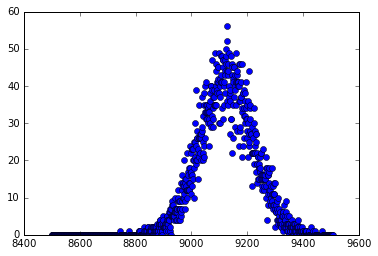

In [7]:
from collections import Counter

for lam in range(365*25, 365*25 + 1, 1000):
    size = 10000
    sample = np.random.poisson(lam, size)

    h = Counter(sample)

    x = range(8500, max(h))
    y = [h.get(xi, 0) for xi in x]

    plt.plot(x, y, 'o')
    plt.show()

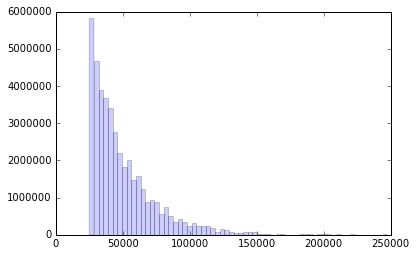

In [37]:
11465*np.exp(-0.00005)
    
beta = 1.0/0.00004
#beta = 1.0

size = 10000
sample = filter(lambda x: x > 25000, np.random.exponential(beta, size))

#plt.hist(sample, normed=True, bins=64, alpha=0.2);
plt.hist(11465*sample, normed=False, bins=64, alpha=0.2);

In [38]:
min(sample), np.mean(sample), np.median(sample), max(sample)

(25005.451671613373,
 50204.286343301923,
 42214.878107969285,
 247497.27366417254)

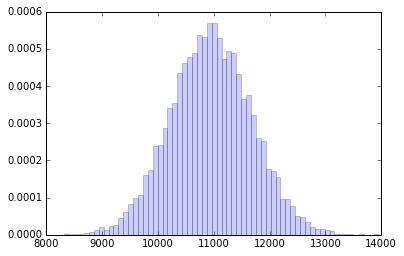

In [13]:
for lam in range(365*30, 365*30 + 1, 1000):
    size = 10000
    sample = np.random.normal(lam, 365*2, size)

    plt.hist(sample, normed=True, bins=64, alpha=0.2)

In [15]:
13000/365.25

35.592060232717316

In [40]:
from datetime import datetime, timedelta

dt_fmt = '%Y%m%d'
now = datetime.strptime('20170718', dt_fmt)

(now - timedelta(days=365*25)).strftime(dt_fmt)

'19920724'